In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [211]:
def linear(x,a,b):
    """ linear function

    Args:
        x (arr): ipuut array
        a (float): 1st order parameter
        b (_float): 0th order parameter ie constant

    Returns:
        arr: returns array of linear evaluated X 
    """
    return x*a + b



def mse(data,a,b):
    
    rootSqr = ((data[1]- (linear(data[0],a,b)))**2)
    MSE = np.mean(rootSqr)
    return MSE

def update(param,raised,minim,lr):
    """    A primitive update function to minimise MSE. Checks wherher change in param increases or decreases MSE.


    Args:
        param (float): parameter to be updated
        raised (Bool): Check whether param has been increased or decreasd
        minim (Bool): Check whether MSE was decreased
        lr (float): learning rate

    Returns:
        _type_: _description_
    """
    if (raised and minim) or (not raised and not minim):
        param += lr
        raised = True
        return param, raised
    else: 
        param -= lr
        raised = False
        return param,raised
    
def gradients(a,b,data):
    
    """     
    gradient descent , calculates partial derivatives of MSE wrt parameters. Could replace manual update function 
    
    """

    da = (2/len(data))* np.sum(linear(data[0],a,b) -data[1])*data[0] # d(MSE )/da partial derivative MSE wrt. a
    db = (2/len(data))* np.sum(linear(data[0],a,b) -data[1])          # d(MSE )/db partial derivative MSE wrt. b
        
def genererate_dataset(x):
    """ generate a linear dataset with Gaussian noise 

    Args:
        x (array): input data

    Returns:
        array: generated  data set with noise
    """
    noise = np.random.normal(loc = 0,scale = 5,size =x.shape)
    return (5*x) +2 + noise
    
    

In [212]:

a0 = (np.random.rand(1)*100)[0]
b0= (np.random.rand(1)*100)[0]
x = np.linspace(0,10,100)
data = [x,genererate_dataset(x)]


In [213]:
a0

1.2048706903639017

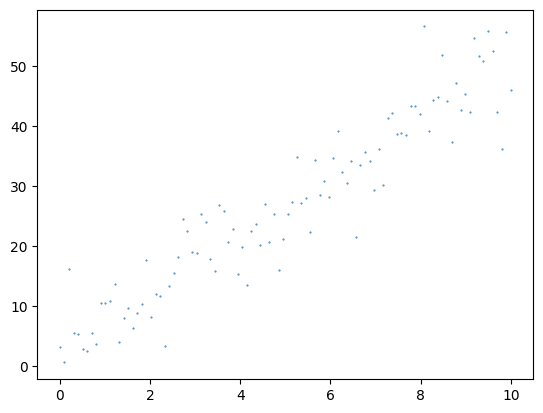

In [214]:
plt.scatter(data[0], data[1] ,s = 0.2)

In [215]:
MSE = [mse(data,a0,b0)]
MSE[0]

293.32570403990593

In [216]:
#parameters
epochs = 10000
lr = 0.1 # learning rate
minim_a = True
raised_a = True
minim_b = True
raised_b = True
a = [a0]
b = [b0]

for i in range(1,epochs):
    if i %100 == 0:   # reduce learning rate every 100 iterations
        lr = lr/1.1
    mse_0 = mse(data,a0,b0)                           #initial mean squared error
    
    
    # update params to minimise mean squared error
    a1, raised_a  = update(a0,minim_a,raised_a, lr)
    if mse(data,a1,b0) <= mse_0:
        minim_a = True
    else: minim_a = False
    
    b1,raised_b  = update(b0,minim_b,raised_b, lr)
    if mse(data,a0,b1) <= mse_0:
        minim_b = True
    else: minim_b = False
    
    # save  parameters and mse i neach iteration
    MSE.append(mse(data,a1,b1))
    a.append(a1)
    b.append(b1)
    a0 = a1
    b0 = b1

print(min(MSE))

24.209408193444087


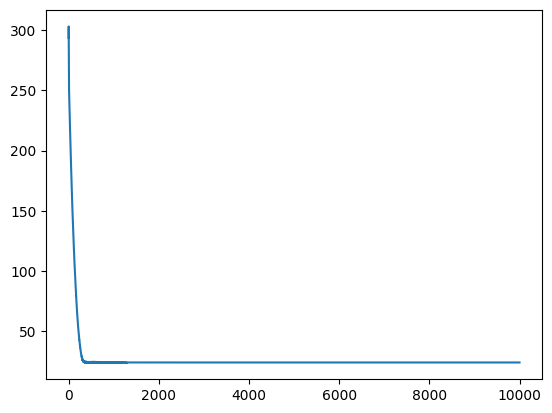

In [217]:
plt.plot(np.arange(0,epochs),MSE)

In [218]:
print(f"Learned a: {a[-1]:.2f}, True a: 5")
print(f"Learned b: {b[-1]:.2f}, True b: 2")

Learned a: 4.78, True a: 5
Learned b: 2.92, True b: 2
